# Problem Set 2b

**By Adam Fattal**

Hope you did well on the theory section, but now it's time to test your qiskit knowledge. Learning how to use new tools can be pretty confusing at first so take your time and don't worry if you don't get it done the first time around. Most importantly, don't give up!

Importing Modules:

In [17]:
from qiskit import *
from qiskit.quantum_info import Statevector
from qiskit.tools.visualization import plot_histogram
import numpy as np
import sympy as sp

## Problem 1:

In question 1 of Problem Set 2a, you were asked to verify the statevectors of three circuits. Build these circuits here and check your answer.

### Q1(a)

In [26]:
# Question 1 (a)

# Defining the circuit and the initial state |psi> = |00>
circ1 = QuantumCircuit(2)
psi1 = Statevector.from_label('00')

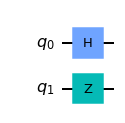

In [27]:
# Build your circuit here
circ1.h(0)
circ1.z(1)
# Drawing the circuit you built
display(circ1.draw('mpl'))

In [33]:
# Evolving the Statevector based on the circuit you constructed
state=psi1.evolve(circ1)
sp.Matrix(state)

Matrix([
[0.707106781186547],
[0.707106781186547],
[                0],
[                0]])

### Q1(b)

In [34]:
# Question 1 (b)

# Defining the circuit and the initial state |psi> = |00>
circ2 = QuantumCircuit(2)
psi2 = Statevector.from_label('00')

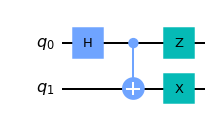

In [35]:
# Build your circuit here
circ2.h(0)
circ2.cx(0,1)
circ2.z(0)
circ2.x(1)
# Draw the circuit you built
display(circ2.draw('mpl'))

In [37]:
# Evolve the Statevector based on the circuit you constructed:
state=psi2.evolve(circ2)
sp.Matrix(state)

Matrix([
[                 0],
[-0.707106781186547],
[ 0.707106781186547],
[                 0]])

### Q1(c)

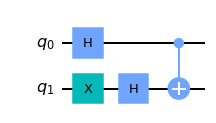

In [38]:
# Question 1 (c)

# Defining the circuit and the initial state |psi> = |00>
circ3 = QuantumCircuit(2)
psi3 = Statevector.from_label('00')

# Build your circuit here
circ3.h(0)
circ3.x(1)
circ3.h(1)
circ3.cx(0,1)
# Draw the circuit you built
display(circ3.draw('mpl'))

In [39]:
# Evolve the Statevector based on the circuit you constructed:
state=psi3.evolve(circ3)
sp.Matrix(state)

Matrix([
[ 0.5],
[-0.5],
[-0.5],
[ 0.5]])

## Problem 2: 


Consider the 4 Bell states shown below.

$$|\phi^+\rangle = \frac{1}{\sqrt{2}}(|00\rangle + |11\rangle)$$

$$|\phi^-\rangle = \frac{1}{\sqrt{2}}(|00\rangle - |11\rangle)$$

$$|\psi^+\rangle = \frac{1}{\sqrt{2}}(|01\rangle + |10\rangle)$$

$$|\psi^+\rangle = \frac{1}{\sqrt{2}}(|01\rangle - |10\rangle)$$


For each one of them, do the following:
1. Build a circuit to get the state and draw it 
2. Run the circuit with 4200 shots and get counts
3. Plot counts on a histogram
4. Briefly discuss the difference between the four results

### $\phi^+$

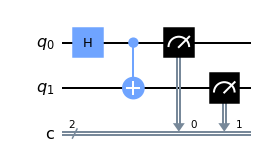

In [64]:
phiPlus = QuantumCircuit(2,2)

# Build and draw circuit
phiPlus.h(0)
phiPlus.cx(0,1)
phiPlus.measure([0,1],[0,1])
phiPlus.draw('mpl')

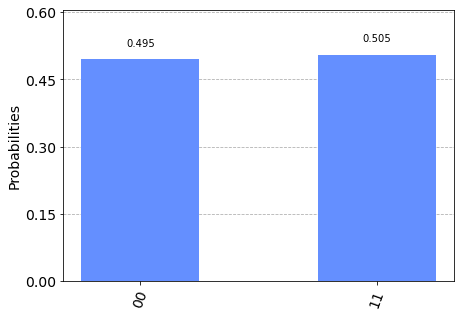

In [45]:
# Simulate on Aer and get counts
backend = Aer.get_backend('aer_simulator')
result = backend.run(phiPlus).result() # use result to get counts
result = execute(phiPlus,backend, shots = 4200).result()
output = result.get_counts()

# Plot histogram with counts
plot_histogram(output)

### $\Phi^-$

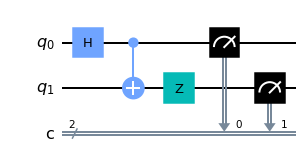

In [48]:
phiMinus = QuantumCircuit(2,2)

# Build and draw circuit
phiMinus.h(0)
phiMinus.cx(0,1)
phiMinus.z(1)
phiMinus.measure([0,1],[0,1])
phiMinus.draw('mpl')

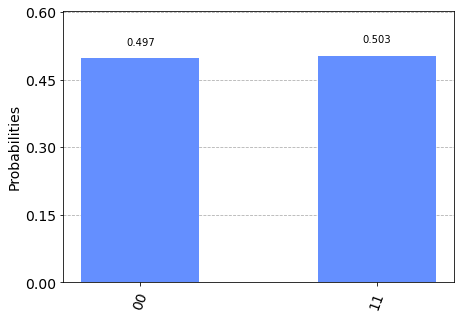

In [55]:
# Simulate on Aer and get counts
backend = Aer.get_backend('aer_simulator')
result = execute(phiMinus,backend, shots = 4200).result()
output = result.get_counts()

# Plot histogram with counts
plot_histogram(output)

### $\psi^+$

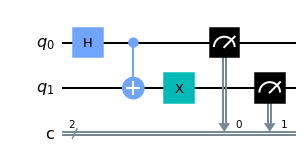

In [56]:
psiPlus = QuantumCircuit(2,2)

# Build and draw circuit
psiPlus.h(0)
psiPlus.cx(0,1)
psiPlus.x(1)
psiPlus.measure([0,1],[0,1])
psiPlus.draw('mpl')

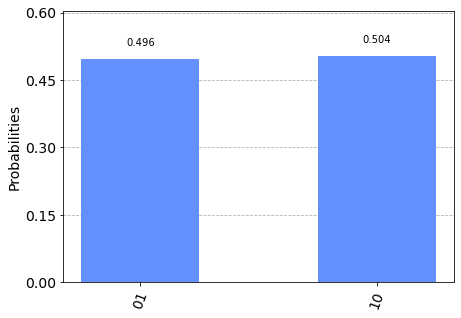

In [57]:
# Simulate on Aer and get counts
backend = Aer.get_backend('aer_simulator')
result = execute(psiPlus,backend, shots = 4200).result()
output = result.get_counts()

# Plot histogram with counts
plot_histogram(output)

### $\psi^-$

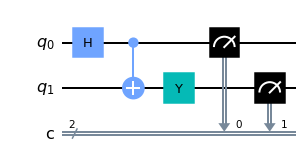

In [63]:
psiMinus = QuantumCircuit(2,2)

# Build and draw circuit
psiMinus.h(0)
psiMinus.cx(0,1)
psiMinus.y(1)
psiMinus.measure([0,1],[0,1])
psiMinus.draw('mpl')

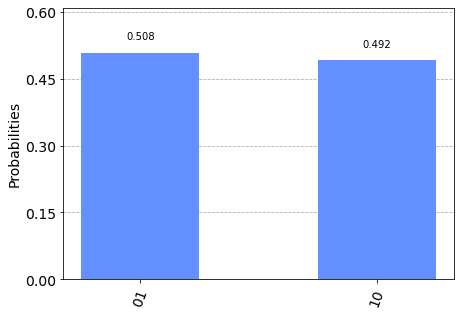

In [65]:
# Simulate on Aer and get counts
backend = Aer.get_backend('aer_simulator')
result = execute(psibMinus,backend, shots = 4200).result()
output = result.get_counts()

# Plot histogram with counts
plot_histogram(output)

In $\phi^+$ and $\phi^-$ states the magnitude of the amplitues of $|00\rangle$ and $|11\rangle$ is the same as apparent from the histogram but the phase of $|11\rangle$ will be minus(or $\pi$) in $\phi^+$.

Similary, In $\psi^+$ and $\psi^-$ states the magnitude of the amplitues of $|01\rangle$ and $|10\rangle$ is the same as apparent from the histogram but the phase of $|10\rangle$  ( but $|10\rangle$ according to qiskit order of taking kronecker prduct) will be minus(or $\pi$) in $\phi^+$.

## Problem 3: 

Run circuits of different lengths (maximum number of gates in a qubit) and sizes (number of qubits) both in a simulator and on real hardware. Compare your results to see if you notice any relation between length/size and the accuracy of the results on the real hardware. Remember, the simulator will give you **ideal** results, so, you can use that results as control.

### 1

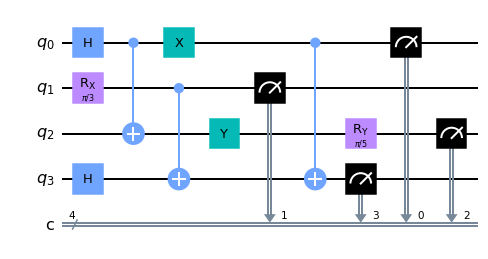

In [112]:
qc1 = QuantumCircuit(4,4)

qc1.h(0)
qc1.h(3)
qc1.rx(np.pi/3,1)
qc1.cx(0,2)
qc1.cx(1,3)
qc1.y(2)
qc1.x(0)
qc1.cx(0,3)
qc1.ry(np.pi/5,2)

qc1.measure([0,1,2,3],[0,1,2,3])
qc1.draw('mpl')

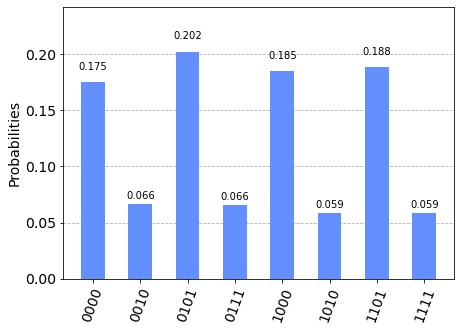

In [89]:
# Simulate on Aer and get counts
backend = Aer.get_backend('aer_simulator')
result = execute(qc1,backend, shots = 4200).result()
output = result.get_counts()

# Plot histogram with counts
plot_histogram(output)

In [107]:
from qiskit import IBMQ

IBMQ.load_account() #This is how you load your account
provider = IBMQ.get_provider('ibm-q') #This is how you get the ibm-q provider

qcomp = provider.get_backend('ibmq_manila') #This is how you select the device you want to use
job = execute(qc1, backend=qcomp, shots=4200) #This is how you tell the device which circuit to run

from qiskit.tools.monitor import job_monitor
job_monitor(job) #Monitor the job
result = job.result() #Get Results

ibmqfactory.load_account:WARNING:2021-07-08 07:08:43,712: Credentials are already in use. The existing account in the session will be replaced.


Job Status: job has successfully run


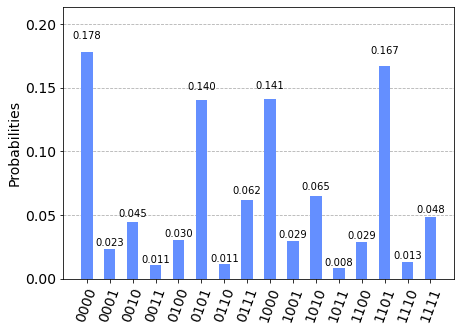

In [109]:
plot_histogram(result.get_counts(qc1))

### 2

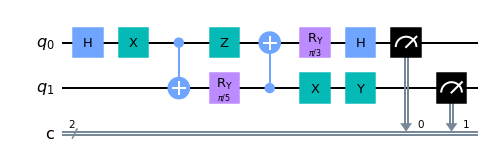

In [119]:
qc2 = QuantumCircuit(2,2) #less bits

#9 gates same as before
qc2.h(0)
qc2.x(0)
qc2.cx(0,1)
qc2.ry(np.pi/5,1)
qc2.z(0)
qc2.cnot(1,0)
qc2.ry(np.pi/3,0)
qc2.x(1)
qc2.h(0)
qc2.y(1)

qc2.measure([0,1],[0,1])

qc2.draw('mpl')

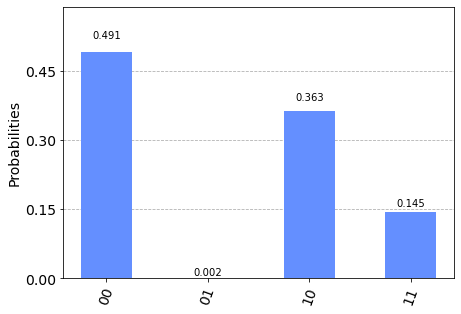

In [123]:
# Simulate on Aer and get counts
backend = Aer.get_backend('aer_simulator')
result = execute(qc2,backend, shots = 4200).result()
output = result.get_counts()

# Plot histogram with counts
plot_histogram(output)

In [124]:
from qiskit import IBMQ

IBMQ.load_account() #This is how you load your account
provider = IBMQ.get_provider('ibm-q') #This is how you get the ibm-q provider

qcomp = provider.get_backend('ibmq_manila') #This is how you select the device you want to use
job = execute(qc2, backend=qcomp, shots=4200) #This is how you tell the device which circuit to run

from qiskit.tools.monitor import job_monitor
job_monitor(job) #Monitor the job
result = job.result() #Get Results

ibmqfactory.load_account:WARNING:2021-07-08 07:26:23,920: Credentials are already in use. The existing account in the session will be replaced.


Job Status: job has successfully run


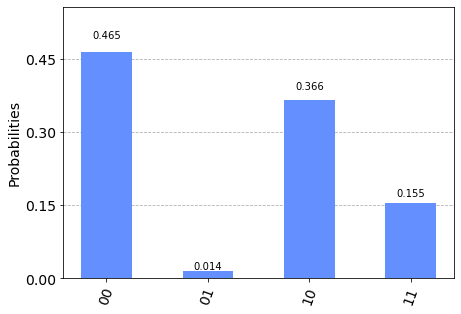

In [127]:
plot_histogram(result.get_counts(qc2))

So it seems that reducing the number of bits greatly increases the accuracy

### 3

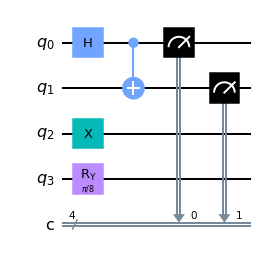

In [131]:
qc3 = QuantumCircuit(4,4) #same bits as 1st ckt

#less gates than 1st ckt
qc3.h(0)
qc3.cnot(0,1)
qc3.x(2)
qc3.ry(np.pi/8,3)

qc3.measure([0,1],[0,1])

qc3.draw('mpl')

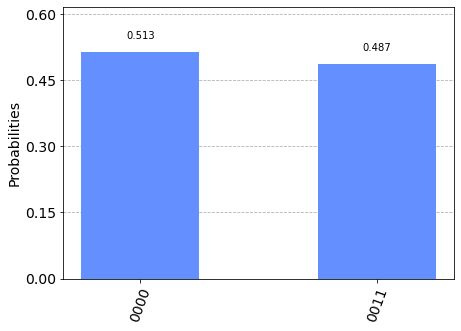

In [132]:
# Simulate on Aer and get counts
backend = Aer.get_backend('aer_simulator')
result = execute(qc3,backend, shots = 4200).result()
output = result.get_counts()

# Plot histogram with counts
plot_histogram(output)

In [140]:
from qiskit import IBMQ

IBMQ.load_account() #This is how you load your account
provider = IBMQ.get_provider('ibm-q') #This is how you get the ibm-q provider

qcomp = provider.get_backend('ibmq_manila') #This is how you select the device you want to use
job = execute(qc3, backend=qcomp, shots=4200) #This is how you tell the device which circuit to run

from qiskit.tools.monitor import job_monitor
job_monitor(job) #Monitor the job
result = job.result() #Get Results

ibmqfactory.load_account:WARNING:2021-07-08 07:41:14,566: Credentials are already in use. The existing account in the session will be replaced.


Job Status: job has successfully run


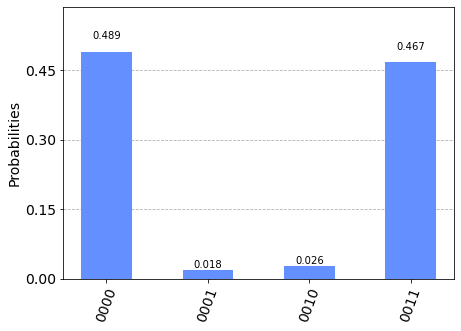

In [142]:
plot_histogram(result.get_counts(qc3))

So, decreasing the number of gates also increases the accuracy.

## Bonus:

According to 6.1 (pg 14) in <a href='https://arxiv.org/pdf/quant-ph/9503016.pdf'>this paper</a>, a controlled-controlled unitary gate, $CCU$ could be decomposed into the following:

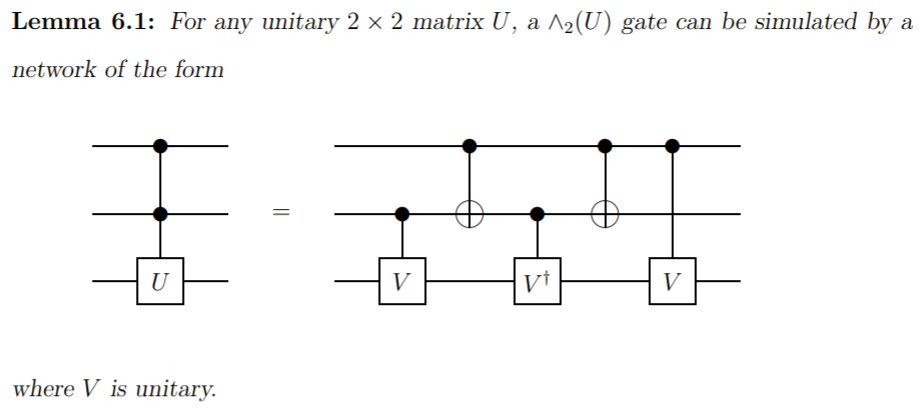

Where $V^2 = U$ ($V$ is the square root of the matrix $U$). Given the square root of the $X$ gate, $SX = \frac{1}{2}\begin{pmatrix} 1+i & 1-i \\1-i & 1+i\end{pmatrix}$, use the decomposition above to construct a $CCX$ gate. Confirm your result by getting either the unitary, the statevector of the circuit, or the counts.

Hint: [`UnitaryGate`](https://qiskit.org/documentation/stubs/qiskit.extensions.UnitaryGate.html) and [`UnitaryGate.control()`](https://qiskit.org/documentation/stubs/qiskit.extensions.UnitaryGate.html#qiskit.extensions.UnitaryGate.control).

This is a hard problem, feel free to ask mentors if you need any help!